In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

def plot_convex_hull(points):
    hull = ConvexHull(points)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot vertices
    ax.plot(points[:, 0], points[:, 1], points[:, 2], 'o')
    
    # Plot faces
    for simplex in hull.simplices:
        s = hull.points[simplex]
        s = np.vstack((s, s[0]))
        ax.plot(s[:, 0], s[:, 1], s[:, 2], "k-")
    #faces = Poly3DCollection([hull.points[simplex] for simplex in hull.simplices], alpha=0.5)
    #faces.set_facecolor('c')
    #ax.add_collection3d(faces)
    ax.grid(False)
    ax.axis('off')
    plt.show()

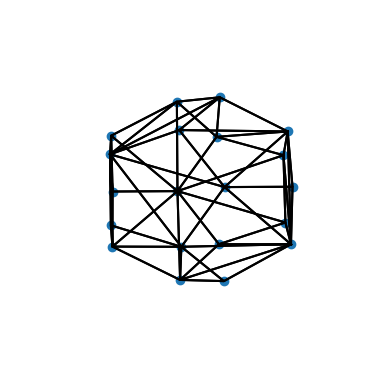

In [15]:
# Dodecahedron
phi = (1 + np.sqrt(5)) / 2
points = np.array([[1, 1, 1], [-1, -1, 1], [-1, 1, -1], [1, -1, -1], 
                   [0, 1/phi, phi], [0, -1/phi, phi], [0, -1/phi, -phi], [0, 1/phi, -phi], 
                   [1/phi, phi, 0], [-1/phi, phi, 0], [-1/phi, -phi, 0], [1/phi, -phi, 0], 
                   [phi, 0, 1/phi], [phi, 0, -1/phi], [-phi, 0, -1/phi], [-phi, 0, 1/phi], 
                   [1, -1, 1], [-1, 1, 1], [1, 1, -1], [-1, -1, -1]])
plot_convex_hull(points)

MovieWriter imagemagick unavailable; using Pillow instead.


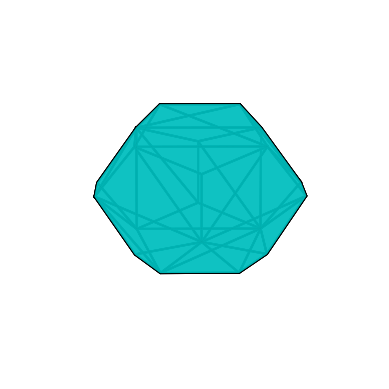

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import FuncAnimation
from scipy.spatial import ConvexHull

phi = (1 + np.sqrt(5)) / 2
points = np.array([[1, 1, 1], [-1, -1, 1], [-1, 1, -1], [1, -1, -1], 
                   [0, 1/phi, phi], [0, -1/phi, phi], [0, -1/phi, -phi], [0, 1/phi, -phi], 
                   [1/phi, phi, 0], [-1/phi, phi, 0], [-1/phi, -phi, 0], [1/phi, -phi, 0], 
                   [phi, 0, 1/phi], [phi, 0, -1/phi], [-phi, 0, -1/phi], [-phi, 0, 1/phi], 
                   [1, -1, 1], [-1, 1, 1], [1, 1, -1], [-1, -1, -1]])

hull = ConvexHull(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Remove axes
ax.axis('off')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

def init():
    # Add faces
    faces = Poly3DCollection([hull.points[simplex] for simplex in hull.simplices], alpha=0.5)
    faces.set_facecolor('c')
    ax.add_collection3d(faces)
    
    # Add edges
    for simplex in hull.simplices:
        s = hull.points[simplex]
        s = np.vstack((s, s[0]))
        ax.plot(s[:, 0], s[:, 1], s[:, 2], "k-")
    
    return faces,

def update(frame):
    ax.view_init(elev=10, azim=frame)
    return ax,

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), init_func=init, blit=False)
anim.save('dodecahedron_rotation.gif', writer='imagemagick')